In [19]:
from utils.dataloaders import get_dataloaders

In [20]:
dataset = "cifar"
data_dir = "./data"

train_loader, test_loader = get_dataloaders(
    dataset=dataset, data_dir=data_dir, batch_size=64, num_workers=2, distributed=False
)

In [21]:
len(train_loader.dataset.classes)

10

In [25]:
for images, labels in train_loader:
    image_size = images.shape[
        2:
    ]  # Assuming the shape is (batch_size, channels, height, width)
    print(image_size)
    break  # Exit the loop after getting the image size from the first batch

torch.Size([32, 32])


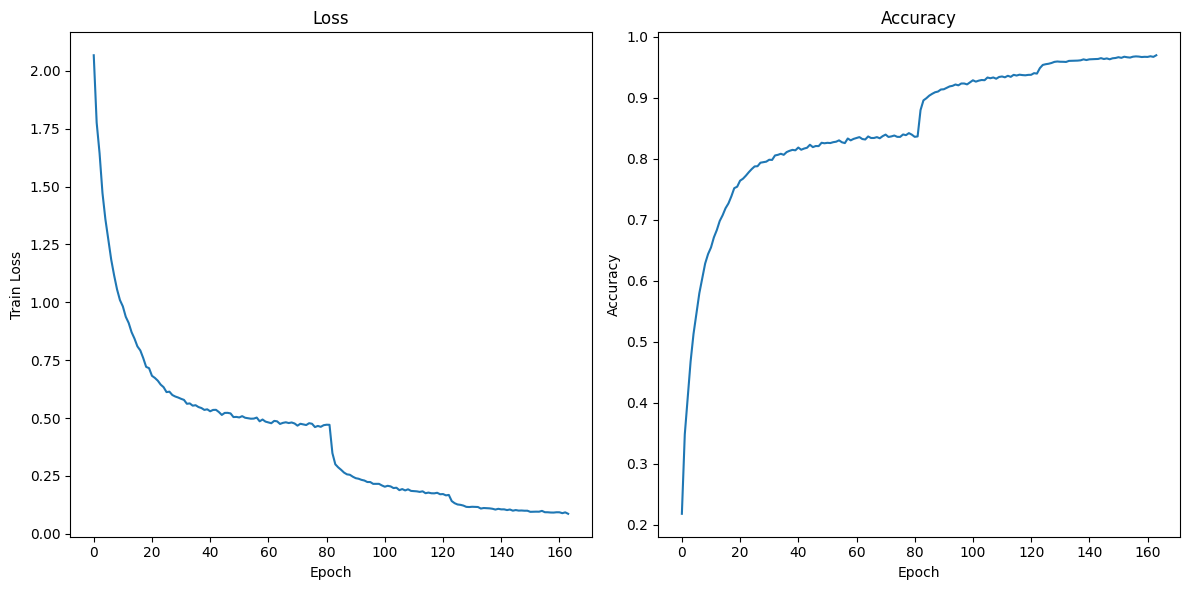

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("results/mobilenet_cifar_full_precision.csv")
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(df["epoch"], df["train_loss"])
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Train Loss")
axs[0].set_title("Loss")
axs[1].plot(df["epoch"], df["train_acc"])
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy")
plt.tight_layout()
plt.show()

In [20]:
import glob

import pandas as pd

results = glob.glob("results/resnet*.csv")
results = [res for res in results if "_results" not in res]

In [55]:
for res in results:
    print(res)
    df = pd.read_csv(res)

    if isinstance(df["train_acc"][0], str) and "tensor" in df["train_acc"][0]:
        df["train_acc"] = df["train_acc"].str.extract(r"(\d+\.\d+)").astype(float)

    df.to_csv(res, index=False)

results/resnet20_cifar_lin_4.csv
results/resnet44_cifar_lin+_2.csv
results/resnet32_cifar_po2_2.csv
results/resnet56_cifar_po2_2.csv
results/resnet32_cifar_po2+_3.csv
results/resnet32_cifar_lin+_2.csv
results/resnet44_cifar_po2_3.csv
results/resnet32_cifar_po2_4.csv
results/resnet56_cifar_lin_4.csv
results/resnet56_cifar_lin+_3.csv
results/resnet44_cifar_po2+_2.csv
results/resnet56_cifar_lin+_2.csv
results/resnet44_cifar_po2+_4.csv
results/resnet20_cifar_lin+_4.csv
results/resnet44_cifar_lin_4.csv
results/resnet32_cifar_po2+_4.csv
results/resnet32_cifar_lin_3.csv
results/resnet32_cifar_lin+_4.csv
results/resnet44_cifar_po2_2.csv
results/resnet44_cifar_po2_4.csv
results/resnet44_cifar_po2+_3.csv
results/resnet20_cifar_po2_4.csv
results/resnet56_cifar_po2+_3.csv
results/resnet20_cifar_po2+_3.csv
results/resnet44_cifar_lin_2.csv
results/resnet56_cifar_po2_3.csv
results/resnet20_cifar_po2_3.csv
results/resnet20_cifar_po2_2.csv
results/resnet20_cifar_po2+_2.csv
results/resnet56_cifar_po2_4.

In [12]:
from models.resnet import ResNet20

model = ResNet20()

with torch.no_grad():
    for name, param in model.named_parameters():
        if "conv" in name and "layer" in name:
            print(name, param.shape)

layer1.0.conv1.weight torch.Size([16, 16, 3, 3])
layer1.0.conv2.weight torch.Size([16, 16, 3, 3])
layer1.1.conv1.weight torch.Size([16, 16, 3, 3])
layer1.1.conv2.weight torch.Size([16, 16, 3, 3])
layer1.2.conv1.weight torch.Size([16, 16, 3, 3])
layer1.2.conv2.weight torch.Size([16, 16, 3, 3])
layer2.0.conv1.weight torch.Size([32, 16, 3, 3])
layer2.0.conv2.weight torch.Size([32, 32, 3, 3])
layer2.1.conv1.weight torch.Size([32, 32, 3, 3])
layer2.1.conv2.weight torch.Size([32, 32, 3, 3])
layer2.2.conv1.weight torch.Size([32, 32, 3, 3])
layer2.2.conv2.weight torch.Size([32, 32, 3, 3])
layer3.0.conv1.weight torch.Size([64, 32, 3, 3])
layer3.0.conv2.weight torch.Size([64, 64, 3, 3])
layer3.1.conv1.weight torch.Size([64, 64, 3, 3])
layer3.1.conv2.weight torch.Size([64, 64, 3, 3])
layer3.2.conv1.weight torch.Size([64, 64, 3, 3])
layer3.2.conv2.weight torch.Size([64, 64, 3, 3])


In [14]:
import torch

from models.mobilenet import MobileNetV2

model = MobileNetV2(num_classes=10, quantize_fn=None, bits=4)

with torch.no_grad():
    for name, param in model.named_parameters():
        if "conv" in name and "features" in name and "features.1" not in name:
            print(name, len(param.shape))

features.2.conv.0.weight 4
features.2.conv.1.weight 1
features.2.conv.1.bias 1
features.2.conv.3.weight 4
features.2.conv.4.weight 1
features.2.conv.4.bias 1
features.2.conv.6.weight 4
features.2.conv.7.weight 1
features.2.conv.7.bias 1
features.3.conv.0.weight 4
features.3.conv.1.weight 1
features.3.conv.1.bias 1
features.3.conv.3.weight 4
features.3.conv.4.weight 1
features.3.conv.4.bias 1
features.3.conv.6.weight 4
features.3.conv.7.weight 1
features.3.conv.7.bias 1
features.4.conv.0.weight 4
features.4.conv.1.weight 1
features.4.conv.1.bias 1
features.4.conv.3.weight 4
features.4.conv.4.weight 1
features.4.conv.4.bias 1
features.4.conv.6.weight 4
features.4.conv.7.weight 1
features.4.conv.7.bias 1
features.5.conv.0.weight 4
features.5.conv.1.weight 1
features.5.conv.1.bias 1
features.5.conv.3.weight 4
features.5.conv.4.weight 1
features.5.conv.4.bias 1
features.5.conv.6.weight 4
features.5.conv.7.weight 1
features.5.conv.7.bias 1
features.6.conv.0.weight 4
features.6.conv.1.weight 

In [3]:
import torch

from models.mobile_vit import MobileVIT

image_size = (32, 32)

model = MobileVIT(
    num_classes=10,
    quantize_fn=None,
    bits=4,
    image_size=image_size,
)

In [5]:
with torch.no_grad():
    for name, param in model.named_parameters():
        print(name)

conv1.0.weight
conv1.1.weight
conv1.1.bias
stem.0.conv.0.weight
stem.0.conv.1.weight
stem.0.conv.1.bias
stem.0.conv.3.weight
stem.0.conv.4.weight
stem.0.conv.4.bias
stem.0.conv.6.weight
stem.0.conv.7.weight
stem.0.conv.7.bias
stem.1.conv.0.weight
stem.1.conv.1.weight
stem.1.conv.1.bias
stem.1.conv.3.weight
stem.1.conv.4.weight
stem.1.conv.4.bias
stem.1.conv.6.weight
stem.1.conv.7.weight
stem.1.conv.7.bias
stem.2.conv.0.weight
stem.2.conv.1.weight
stem.2.conv.1.bias
stem.2.conv.3.weight
stem.2.conv.4.weight
stem.2.conv.4.bias
stem.2.conv.6.weight
stem.2.conv.7.weight
stem.2.conv.7.bias
stem.3.conv.0.weight
stem.3.conv.1.weight
stem.3.conv.1.bias
stem.3.conv.3.weight
stem.3.conv.4.weight
stem.3.conv.4.bias
stem.3.conv.6.weight
stem.3.conv.7.weight
stem.3.conv.7.bias
trunk.0.0.conv.0.weight
trunk.0.0.conv.1.weight
trunk.0.0.conv.1.bias
trunk.0.0.conv.3.weight
trunk.0.0.conv.4.weight
trunk.0.0.conv.4.bias
trunk.0.0.conv.6.weight
trunk.0.0.conv.7.weight
trunk.0.0.conv.7.bias
trunk.0.1.conv1